In [2]:
import pandas as pd
import os

# Just to confirm where you are
print("Notebook running from:", os.getcwd())

# Correct path to the Excel file
file_path = "../data/sales_data.xlsx"

# Load the Excel file
excel_file = pd.ExcelFile(file_path)

# Show available sheet names
excel_file.sheet_names


Notebook running from: /Users/junhoha/Documents/BOA_project/analysis


['VitaSip raw data']

In [3]:
# Load the actual data sheet
df = pd.read_excel(file_path, sheet_name='VitaSip raw data')

# Show the first few rows
df.head()


,Date of Sale,Product,Channel,Customer Type,Quantity,Total Sale,Total Direct Cost,Location
0,2024-01-01,FocusFizz,Boutique Fitness Studios,New,1.0,4.0,2.2,UK
1,2024-01-01,FocusFizz,Boutique Fitness Studios,New,3.0,12.0,6.6,UK
2,2024-01-01,FocusFizz,Boutique Fitness Studios,New,2.0,8.0,4.4,UK
3,2024-01-01,FocusFizz,Boutique Fitness Studios,New,2.0,8.0,4.4,UK
4,2024-01-01,FocusFizz,Boutique Fitness Studios,New,1.0,4.0,2.2,UK


In [4]:
# Rename columns to make them easier to work with
df = df.rename(columns={
    'Date of Sale': 'Date',
    'Customer Type': 'Customer',
    'Total Sale': 'Sales',
    'Total Direct Cost': 'Cost'
})

df.columns



Index(['Date', 'Product', 'Channel', 'Customer', 'Quantity', 'Sales', 'Cost',
       'Location'],
      dtype='object')

In [5]:
# Calculate key metrics
df['Date'] = pd.to_datetime(df['Date'])
df['Profit'] = df['Sales'] - df['Cost']
df['Gross Margin'] = df['Profit'] / df['Sales']
df['Price per Unit'] = df['Sales'] / df['Quantity']
df['Cost per Unit'] = df['Cost'] / df['Quantity']

# Remove zero quantity rows
df = df[df['Quantity'] > 0]

# Calculate key metrics
df['Date'] = pd.to_datetime(df['Date'])
df['Profit'] = df['Sales'] - df['Cost']
df['Gross Margin'] = df['Profit'] / df['Sales']
df['Price per Unit'] = df['Sales'] / df['Quantity']
df['Cost per Unit'] = df['Cost'] / df['Quantity']

# --- Outlier Filtering ---
q_low = df['Quantity'].quantile(0.01)
q_high = df['Quantity'].quantile(0.99)
p_low = df['Price per Unit'].quantile(0.01)
p_high = df['Price per Unit'].quantile(0.99)

# Final clean dataset
df = df[
    (df['Quantity'] >= q_low) & (df['Quantity'] <= q_high) &
    (df['Price per Unit'] >= p_low) & (df['Price per Unit'] <= p_high)
]


In [17]:
# --- KPI Calculation Block ---

# Total Revenue = Total Sales (same in this context, but defined for completeness)
total_sales = df['Sales'].sum()
total_revenue = total_sales  # can redefine if revenue includes other income streams
total_cost = df['Cost'].sum()
total_profit = df['Profit'].sum()
average_margin = (total_profit / total_sales) * 100

# Units sold
total_units = df['Quantity'].sum()

# Average unit profit
df['Unit Profit'] = df['Profit'] / df['Quantity']
average_unit_profit = df['Unit Profit'].mean()

# Display results
print("📊 Key Performance Indicators (KPI)")
print(f"Total Revenue (£): {total_revenue:,.2f}")
print(f"Total Sales (£): {total_sales:,.2f}")
print(f"Total Profit (£): {total_profit:,.2f}")
print(f"Average Gross Margin (%): {average_margin:.2f}%")
print(f"Units Sold: {int(total_units):,}")
print(f"Average Unit Profit (£): {average_unit_profit:.2f}")


📊 Key Performance Indicators (KPI)
Total Revenue (£): 39,005.80
Total Sales (£): 39,005.80
Total Profit (£): 18,506.61
Average Gross Margin (%): 47.45%
Units Sold: 10,542
Average Unit Profit (£): 1.57


In [6]:
# Summary by Product
product_summary = df.groupby('Product')[['Sales', 'Cost', 'Profit']].sum().sort_values('Sales', ascending=False)
product_summary['Gross Margin'] = product_summary['Profit'] / product_summary['Sales']

# Summary by Channel
channel_summary = df.groupby('Channel')[['Sales', 'Cost', 'Profit']].sum()
channel_summary['Gross Margin'] = channel_summary['Profit'] / channel_summary['Sales']

# Summary by Customer
customer_summary = df.groupby('Customer')[['Sales', 'Profit']].sum()

product_summary, channel_summary, customer_summary


(                  Sales     Cost   Profit  Gross Margin
 Product                                                
 GlowTonic      11596.90  6631.16  4965.74      0.428195
 FocusFizz      10990.15  5939.22  5050.93      0.459587
 CalmKombu      10530.25  5492.65  5037.60      0.478393
 RestRefresher   5888.50  2436.16  3452.34      0.586285,
                             Sales      Cost    Profit  Gross Margin
 Channel                                                            
 Boutique Fitness Studios   7524.0   3996.19   3527.81      0.468874
 Online                    22407.8  11164.70  11243.10      0.501749
 Third-Party Retail         9074.0   5338.30   3735.70      0.411693,
                 Sales   Profit
 Customer                      
 New           12394.0  6239.27
 Returning     17604.0  8013.72
 Subscription   8980.8  4238.42
 Unknown          27.0    15.20)

/var/folders/w8/ggzq1rh51wq6q9cs8wd1yk900000gn/T/ipykernel_921/4124340722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_summary.index, y=product_summary['Sales'], palette="Blues_d")


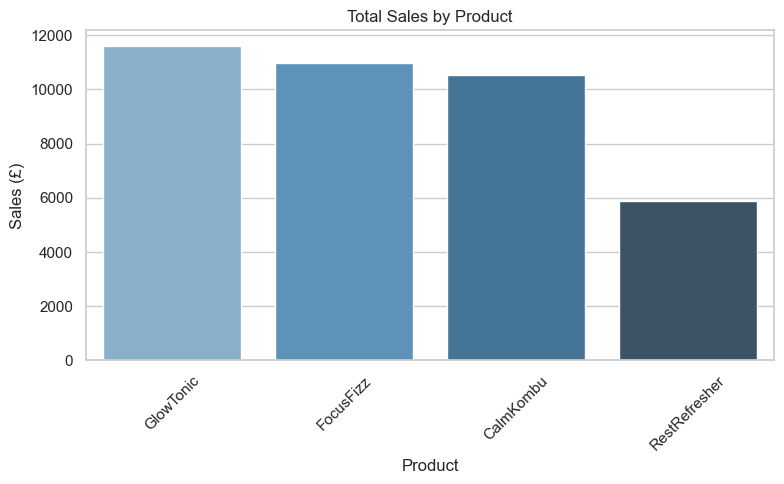

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set(style="whitegrid")

# Bar chart: Sales by product
plt.figure(figsize=(8, 5))
sns.barplot(x=product_summary.index, y=product_summary['Sales'], palette="Blues_d")
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Sales (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


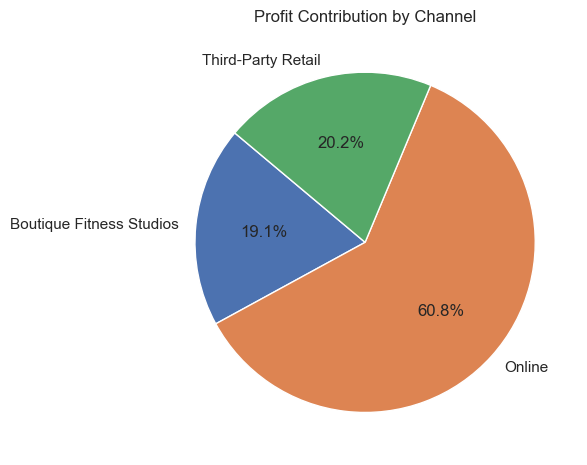

In [8]:
# Pie chart: Profit by channel
plt.figure(figsize=(6, 6))
plt.pie(channel_summary['Profit'], labels=channel_summary.index, autopct='%1.1f%%', startangle=140)
plt.title("Profit Contribution by Channel")
plt.tight_layout()
plt.show()


/var/folders/w8/ggzq1rh51wq6q9cs8wd1yk900000gn/T/ipykernel_921/1558927519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_summary.index, y=customer_summary['Profit'], palette="Greens")


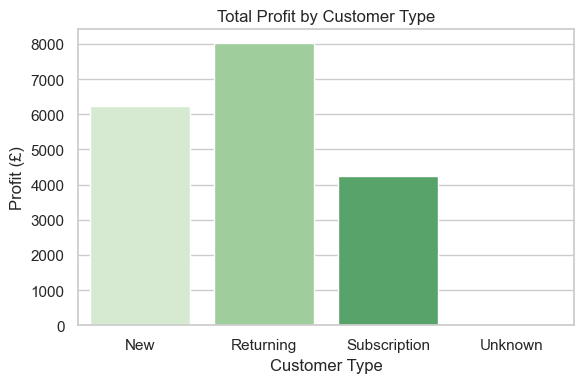

In [9]:
# Bar chart: Profit by customer type
plt.figure(figsize=(6, 4))
sns.barplot(x=customer_summary.index, y=customer_summary['Profit'], palette="Greens")
plt.title("Total Profit by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Profit (£)")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

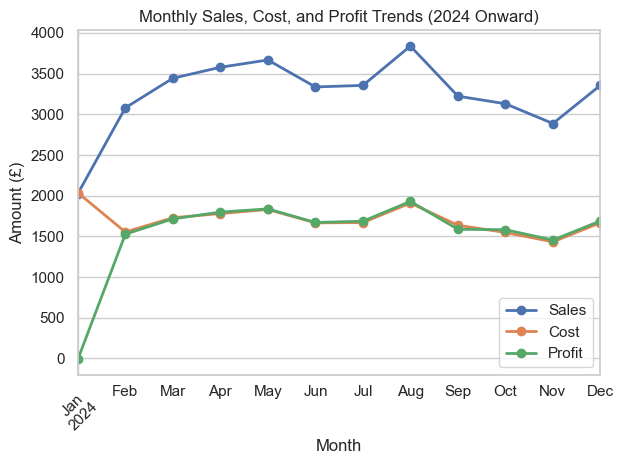

<Figure size 1000x600 with 0 Axes>

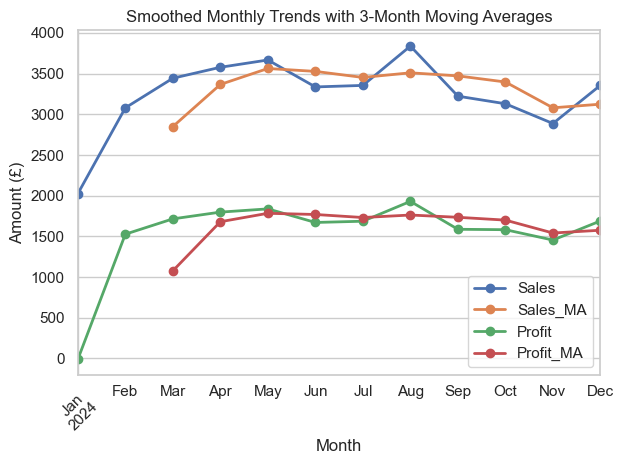

In [10]:
# --- Monthly Trends Analysis Section ---



# Convert 'Date' to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Extract 'Month' for time-based grouping
df['Month'] = df['Date'].dt.to_period('M')

# Group by Month and sum up the values
monthly_summary = df.groupby('Month')[['Sales', 'Cost', 'Profit']].sum()
monthly_summary.index = monthly_summary.index.to_timestamp()

# Filter from 2024 onwards
monthly_summary_filtered = monthly_summary.loc["2024-01":].copy()

# Optional: Add 3-month moving averages
monthly_summary_filtered['Sales_MA'] = monthly_summary_filtered['Sales'].rolling(3).mean()
monthly_summary_filtered['Profit_MA'] = monthly_summary_filtered['Profit'].rolling(3).mean()

# Plot the Monthly Trends
plt.figure(figsize=(10, 6))
monthly_summary_filtered[['Sales', 'Cost', 'Profit']].plot(marker='o', linewidth=2)
plt.title("Monthly Sales, Cost, and Profit Trends (2024 Onward)")
plt.xlabel("Month")
plt.ylabel("Amount (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Smoothed view
plt.figure(figsize=(10, 6))
monthly_summary_filtered[['Sales', 'Sales_MA', 'Profit', 'Profit_MA']].plot(marker='o', linewidth=2)
plt.title("Smoothed Monthly Trends with 3-Month Moving Averages")
plt.xlabel("Month")
plt.ylabel("Amount (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# --- Unit Profit Analysis ---

# Calculate unit price, cost, and profit per product
unit_metrics = df.groupby('Product').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Cost': 'sum',
    'Profit': 'sum'
})

# Avoid division by zero
unit_metrics = unit_metrics[unit_metrics['Quantity'] > 0]

# Calculate per-unit metrics
unit_metrics['Price per Unit'] = unit_metrics['Sales'] / unit_metrics['Quantity']
unit_metrics['Cost per Unit'] = unit_metrics['Cost'] / unit_metrics['Quantity']
unit_metrics['Profit per Unit'] = unit_metrics['Profit'] / unit_metrics['Quantity']

# Sort by profit per unit (descending)
unit_metrics_sorted = unit_metrics.sort_values('Profit per Unit', ascending=False)

# Display key metrics
unit_metrics_sorted[['Price per Unit', 'Cost per Unit', 'Profit per Unit']]


,Price per Unit,Cost per Unit,Profit per Unit
Product,,,
CalmKombu,3.921881,2.045680,1.876201
GlowTonic,4.335290,2.478938,1.856351
RestRefresher,2.951629,1.221133,1.730496
FocusFizz,3.448431,1.863577,1.584854


In [14]:
# Outlier detection

# Add Price per Unit and Cost per Unit to base data
df['Price per Unit'] = df['Sales'] / df['Quantity']
df['Cost per Unit'] = df['Cost'] / df['Quantity']

# Remove rows with 0 quantity to avoid divide-by-zero errors
df_cleaned = df[df['Quantity'] > 0].copy()

# Look at entries with extreme unit prices
high_price = df_cleaned[df_cleaned['Price per Unit'] > df_cleaned['Price per Unit'].quantile(0.99)]
low_price = df_cleaned[df_cleaned['Price per Unit'] < df_cleaned['Price per Unit'].quantile(0.01)]

# Look at extreme quantities
high_quantity = df_cleaned[df_cleaned['Quantity'] > df_cleaned['Quantity'].quantile(0.99)]
low_quantity = df_cleaned[df_cleaned['Quantity'] < df_cleaned['Quantity'].quantile(0.01)]

# Combine into a dictionary to display
outliers_summary = {
    'High Price per Unit': high_price,
    'Low Price per Unit': low_price,
    'High Quantity': high_quantity,
    'Low Quantity': low_quantity
}

outliers_summary['High Price per Unit'].head()


,Date,Product,Channel,Customer,Quantity,Sales,Cost,Location,Profit,Gross Margin,Price per Unit,Cost per Unit,Month


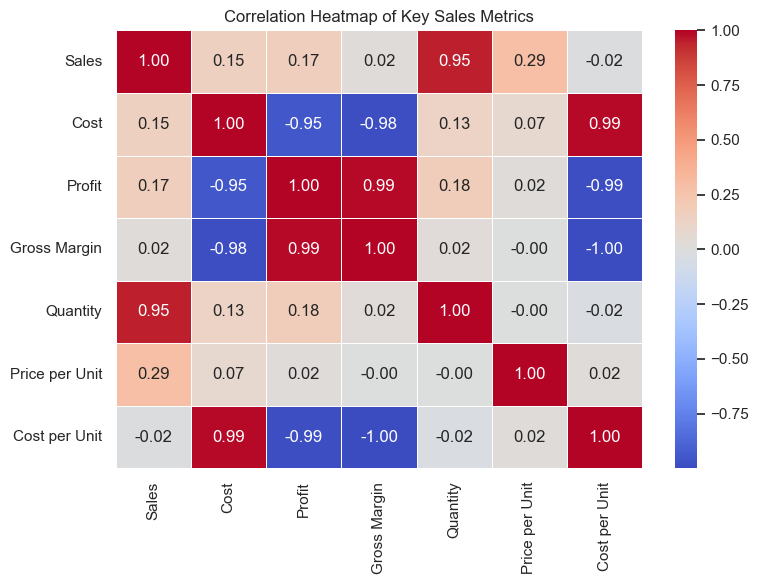

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define which numerical columns to analyze
correlation_cols = ['Sales', 'Cost', 'Profit', 'Gross Margin', 'Quantity', 'Price per Unit', 'Cost per Unit']

# Step 2: Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Sales Metrics")
plt.tight_layout()
plt.show()
